In [1]:
import requests
import pandas as pd
import numpy as np
from datetime import datetime
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [2]:

transaction_data = pd.read_csv("https://cdn.nuwe.io/challenges-ds-datasets/hackathon-caixabank-data-24/transactions_data.csv")
client_data = pd.read_csv("/Users/adolfoartolamadrigal/Documents/Irohacks/Hackaton/users_data.csv")
cards_data = pd.read_csv("/Users/adolfoartolamadrigal/Documents/Irohacks/Hackaton/cards_data.csv")

In [3]:
print(transaction_data.shape)
print(client_data.shape)
print(cards_data.shape)

(13305915, 12)
(2000, 14)
(6146, 13)


In [4]:
cards_clients = cards_data.merge(client_data, how = "left", left_on="client_id", right_on="id")

**Part 1:**
  - **Task 1:** Submit the answers to the following queries: 
    - **query_1:** The `card_id` with the latest expiry date and the lowest credit limit amount. 
    - **query_2:** The `client_id` that will retire within a year that has the lowest credit score and highest debt. 
    - **query_3:** The `transaction_id` of an Online purchase on a 31st of December with the highest absolute amount (either earnings or expenses). 
    - **query_4:** Which client over the age of 40 made the most transactions with a Visa card in February 2016? Please return the `client_id`, the `card_id` involved, and the total number of transactions. 


### Q1

In [5]:
cards_date_v2 = cards_clients.copy()
cards_date_v2["expires2"] = pd.to_datetime(cards_date_v2.expires)
today = datetime.now()
cards_date_v2["expires_diff"] = (cards_date_v2["expires2"]-today).dt.days
regex_pattern = r'^\$'
cards_date_v2["credit_limit2"] = cards_date_v2["credit_limit"].str.replace(regex_pattern,"",regex = True)

/var/folders/6g/dhv5ylld76zgp_63c85rplcc0000gn/T/ipykernel_15964/2195250666.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cards_date_v2["expires2"] = pd.to_datetime(cards_date_v2.expires)


In [6]:
cards_date_v2[
    cards_date_v2.expires_diff == cards_date_v2["expires_diff"].max()
    ].sort_values(by ="credit_limit2", ascending = True).head(1)

,id_x,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,id_y,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,expires2,expires_diff,credit_limit2
5211,4137,1348,Mastercard,Debit,5792498646569711,12/2024,554,YES,1,$0,08/2004,2009,No,1348,83,64,1936,6,Male,873 Summit Street,40.64,-73.94,$0,$2,$0,667,6,2024-12-01,-12,0


### Q2

In [7]:
cards_clients_v2 = cards_clients.copy()
cards_clients_v2["year"] = 2024
cards_clients_v2["credit_limit2"] = pd.to_numeric(cards_date_v2["credit_limit"].str.replace(regex_pattern,"",regex = True))
cards_clients_v2["actual_age"] = cards_clients_v2["year"]-cards_clients_v2["birth_year"]
cards_clients_v2["years_to_retirement"] = cards_clients_v2["retirement_age"] - cards_clients_v2["actual_age"]
min_year = cards_clients_v2.loc[cards_clients_v2["years_to_retirement"]>0,"years_to_retirement"].min()
min_credit = cards_clients_v2.loc[cards_clients_v2["years_to_retirement"]>0,"credit_limit2"].min()



In [8]:
cards_clients_v2.loc[
    cards_clients_v2["years_to_retirement"] == min_year
].sort_values(by = "credit_limit2", ascending= True ).head(1)

,id_x,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,id_y,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,year,credit_limit2,actual_age,years_to_retirement
2445,3887,1901,Mastercard,Debit (Prepaid),5481575854699028,01/2013,766,YES,2,$24,07/2009,2016,No,1901,63,69,1956,3,Female,292 First Avenue,43.69,-84.76,$16542,$33728,$107287,730,3,2024,24,68,1


### Q3

In [9]:
transaction_data_v2 = transaction_data.copy()
transaction_data_v2["date"] = pd.to_datetime(transaction_data_v2["date"])
regex_pattern = r'^\$'
transaction_data_v2["amount2"] = pd.to_numeric(transaction_data_v2["amount"].str.replace(regex_pattern,"",regex=True))

max_amount = transaction_data_v2.loc[
    (transaction_data_v2["date"].dt.month == 12) &
    (transaction_data_v2["date"].dt.day == 31) &
    (transaction_data_v2["merchant_city"] == "ONLINE"),
    "amount2"
].max()

min_amount = transaction_data_v2.loc[
    (transaction_data_v2["date"].dt.month == 12) &
    (transaction_data_v2["date"].dt.day == 31) &
    (transaction_data_v2["merchant_city"] == "ONLINE"),
    "amount2"
].min()


In [10]:
transaction_data_v2.loc[
    (transaction_data_v2["date"].dt.month == 12) &
    (transaction_data_v2["date"].dt.day == 31) &
    (transaction_data_v2["merchant_city"] == "ONLINE") &
    ((transaction_data_v2["amount2"] ==max_amount)|
     (transaction_data_v2["amount2"] ==min_amount))
]

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,amount2
2529289,10534178,2011-12-31 09:14:00,1102,2822,$914.97,Online Transaction,11722,ONLINE,NaN,NaN,6300,NaN,914.97
3852746,12147225,2012-12-31 18:47:00,87,109,$-489.00,Online Transaction,52073,ONLINE,NaN,NaN,4722,NaN,-489.00


### Q4

In [11]:
all_merged = transaction_data.merge(cards_clients, how = "left" ,left_on=["client_id","card_id"],right_on=["id_y","id_x"])

In [12]:
all_merged.rename(columns={"client_id_x":"client_id_t",
                           "card_id":"t_card_id",
                           "id_x":"card_id",
                           "client_id_y": "client_id_ca",
                           "id_y":"client_id"
                           },inplace=True)

In [13]:
all_merged["Age"] = 2024 - all_merged["birth_year"]
all_merged["date"] = pd.to_datetime(all_merged["date"])

In [14]:
q4 = all_merged.loc[
    (all_merged["Age"]==40) &
    (all_merged["card_brand"] =="Visa")&
    ((all_merged["date"]> "2016-02-01")& (all_merged["date"]< "2016-02-29")),
    ["client_id", "card_id"]
    ].value_counts().reset_index().sort_values(by = ["client_id", "card_id"],ascending= True)

q4.sort_values(by = "count", ascending= False).head(1)

,client_id,card_id,count
0,972,4166,84


  - **Task 2:** Implement the functions stated on the file `src/data/data_functions.py`. The input dataset will be the `transactions.csv` file in its given raw format with the dates parsed into datetime format. The expected functionality of each function is described within the `src/data/data_functions.py` file:
    - **Function:** earnings_and_expenses(data,client_id,start_date,end_date)
    - **Function:** expenses_summary(data,client_id,start_date,end_date)
    - **Function:** cash_flow_summary(data,client_id,start_date,end_date)

In [15]:
def earnings_and_expenses(
    df: pd.DataFrame, client_id: int, start_date: str, end_date: str
) -> pd.DataFrame:
    """
    For the period defined in between start_date and end_date (both included), get the client data available and return
    a pandas DataFrame with the Earnings and Expenses total amount for the period range and user given.The expected columns are:
        - Earnings
        - Expenses
    The DataFrame should have the columns in this order ['Earnings','Expenses']. Round the amounts to 2 decimals.

    Create a Bar Plot with the Earnings and Expenses absolute values and save it as "reports/figures/earnings_and_expenses.png" .

    Parameters
    ----------
    df : pandas DataFrame
       DataFrame of the data to be used for the agent.
    client_id : int
        Id of the client.
    start_date : str
        Start date for the date period. In the format "YYYY-MM-DD".
    end_date : str
        End date for the date period. In the format "YYYY-MM-DD".


    Returns
    -------
    Pandas Dataframe with the earnings and expenses rounded to 2 decimals.

    """
    regex_pattern = r'^\$'
    df["amount2"] = pd.to_numeric(df["amount"].str.replace(regex_pattern,"",regex=True),errors="coerce")
    df["date"] = pd.to_datetime(df["date"],errors="coerce")
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    client_df = df.loc[
        (df["client_id"] == client_id) &
        ((df["date"]>= start_date)& (df["date"]<= end_date))
    ]
    expenses = client_df["amount2"].where(client_df["amount2"]<0,0).abs().tolist()
    earnings = client_df["amount2"].where(client_df["amount2"]>0,0).tolist()

    return pd.DataFrame({"Earnings": earnings, "Expenses": expenses})

<Axes: >

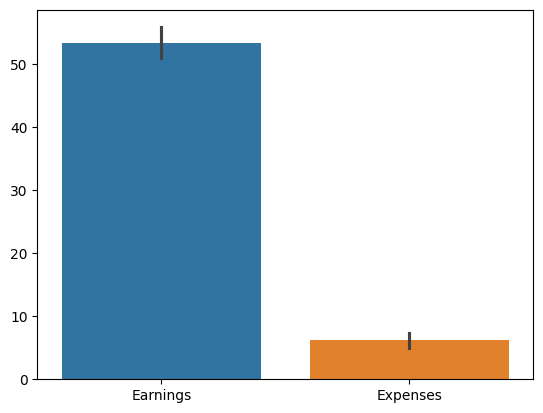

In [16]:
eran_exp = earnings_and_expenses(transaction_data,1557,"2010-01-01","2023-12-31")
sns.barplot(data =eran_exp)

In [17]:
def expenses_summary(
    df: pd.DataFrame, client_id: int, start_date: str, end_date: str
) -> pd.DataFrame:
    """
    For the period defined in between start_date and end_date (both included), get the client data available and return
    a Pandas Data Frame with the Expenses by merchant category. The expected columns are:
        - Expenses Type --> (merchant category names)
        - Total Amount
        - Average
        - Max
        - Min
        - Num. Transactions
    The DataFrame should be sorted alphabeticaly by Expenses Type and values have to be rounded to 2 decimals. Return the dataframe with the columns in the given order.
    The merchant category names can be found in data/raw/mcc_codes.json .

    Create a Bar Plot with the data in absolute values and save it as "reports/figures/expenses_summary.png" .

    Parameters
    ----------
    df : pandas DataFrame
       DataFrame  of the data to be used for the agent.
    client_id : int
        Id of the client.
    start_date : str
        Start date for the date period. In the format "YYYY-MM-DD".
    end_date : str
        End date for the date period. In the format "YYYY-MM-DD".


    Returns
    -------
    Pandas Dataframe with the Expenses by merchant category.

    """
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    merchant_df = df.loc[
    (df["client_id"] == client_id) &
    ((df["date"]>=start_date) & (transaction_data["date"]<=end_date))
    ]   

    return merchant_df.groupby("mcc")["amount2"].agg(["sum","max","min","count"])



In [16]:
expenses_summary(transaction_data,101,"2014-01-01","2023-01-01")

TypeError: '>=' not supported between instances of 'str' and 'Timestamp'

In [19]:
def cash_flow_summary(
    df: pd.DataFrame, client_id: int, start_date: str, end_date: str
) -> pd.DataFrame:
    """
    For the period defined by start_date and end_date (both inclusive), retrieve the available client data and return a Pandas DataFrame containing cash flow information.

    If the period exceeds 60 days, group the data by month, using the end of each month for the date. If the period is 60 days or shorter, group the data by week.

        The expected columns are:
            - Date --> the date for the period. YYYY-MM if period larger than 60 days, YYYY-MM-DD otherwise.
            - Inflows --> the sum of the earnings (positive amounts)
            - Outflows --> the sum of the expenses (absolute values of the negative amounts)
            - Net Cash Flow --> Inflows - Outflows
            - % Savings --> Percentage of Net Cash Flow / Inflows

        The DataFrame should be sorted by ascending date and values rounded to 2 decimals. The columns should be in the given order.

        Parameters
        ----------
        df : pandas DataFrame
           DataFrame  of the data to be used for the agent.
        client_id : int
            Id of the client.
        start_date : str
            Start date for the date period. In the format "YYYY-MM-DD".
        end_date : str
            End date for the date period. In the format "YYYY-MM-DD".


        Returns
        -------
        Pandas Dataframe with the cash flow summary.

    """
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    days_diff = (end_date-start_date).days


    cf = df.loc[
        (df["client_id"] == client_id) &
        ((df["date"]>= start_date) & (transaction_data["date"]<= end_date))
    ]

    if days_diff<=60:
        cf["week"] = cf["date"].dt.isocalendar().week
        cf["inflows"] = cf["amount2"].where(cf["amount2"]>0,0).values.tolist()
        cf["outflows"] = cf["amount2"].where(cf["amount2"]<0,0).abs().values.tolist()
        cf["Net Cash Flow"] = cf["inflows"]-cf["outflows"]

        cf_1 = cf[["week","inflows","outflows","Net Cash Flow"]]
        cf_2 =  cf_1.groupby("week").agg("sum")
        cf_2["Accumulated Cash Flow"] = cf_2["Net Cash Flow"].cumsum()
        cf_2["%Savings"] = (cf_2["Accumulated Cash Flow"]/cf_2["inflows"]).round(2)

        return cf_2
    
    elif days_diff >=60:
        cf['Year-Month'] = cf['date'].dt.strftime('%Y-%m')
        cf["inflows"] = cf["amount2"].where(cf["amount2"]>0,0).values.tolist()
        cf["outflows"] = cf["amount2"].where(cf["amount2"]<0,0).abs().values.tolist()
        cf["Net Cash Flow"] = cf["inflows"]-cf["outflows"]

        cf_1 = cf[["Year-Month","inflows","outflows","Net Cash Flow"]]
        cf_2 = cf_1.groupby("Year-Month").agg("sum")
        cf_2["Accumulated Cash Flow"] = cf_2["Net Cash Flow"].cumsum()
        cf_2["%Savings"] = (cf_2["Accumulated Cash Flow"]/cf_2["inflows"]).round(2)
        return cf_2

            
  

      

In [20]:
cash_flow_summary(transaction_data, 1456,"2010-01-01","2018-02-28")

/var/folders/6g/dhv5ylld76zgp_63c85rplcc0000gn/T/ipykernel_3498/677067147.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cf['Year-Month'] = cf['date'].dt.strftime('%Y-%m')
/var/folders/6g/dhv5ylld76zgp_63c85rplcc0000gn/T/ipykernel_3498/677067147.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cf["inflows"] = cf["amount2"].where(cf["amount2"]>0,0).values.tolist()
/var/folders/6g/dhv5ylld76zgp_63c85rplcc0000gn/T/ipykernel_3498/677067147.py:61: SettingWithCopyWarning: 
A value is trying to be set on

,inflows,outflows,Net Cash Flow,Accumulated Cash Flow,%Savings
Year-Month,,,,,
2010-01,6945.69,230.00,6715.69,6715.69,0.97
2010-02,5352.34,68.00,5284.34,12000.03,2.24
2010-03,6423.96,97.00,6326.96,18326.99,2.85
2010-04,4455.81,0.00,4455.81,22782.80,5.11
2010-05,6790.57,146.00,6644.57,29427.37,4.33
2010-06,7488.10,519.00,6969.10,36396.47,4.86
2010-07,5330.72,495.00,4835.72,41232.19,7.73
2010-08,7015.51,524.00,6491.51,47723.70,6.80
2010-09,5242.26,62.00,5180.26,52903.96,10.09
